In [1]:
import pandas, gensim, matplotlib, sklearn

In [2]:
news_df = pandas.concat([pandas.read_pickle('../news_df_norm1.pkl'), pandas.read_pickle('../news_df_norm2.pkl')])

In [3]:
news_df.iloc[3].normalized_tokens

['agl',
 'liddell',
 'power',
 'station',
 'grandmother',
 'plant',
 'receive',
 'funds',
 'usefully',
 'invested',
 'elsewhere',
 'improve',
 'australia',
 'energy',
 'prospects',
 'christiana',
 'figueres',
 'former',
 'united',
 'nations',
 'climate',
 'chief',
 'said',
 'ms',
 'figueres',
 'executive',
 'secretary',
 'un',
 'framework',
 'convention',
 'climate',
 'change',
 'oversaw',
 'paris',
 'climate',
 'agreement',
 'said',
 'time',
 'running',
 'australia',
 'get',
 'energy',
 'carbon',
 'policies',
 'order',
 'time',
 'short',
 'ms',
 'figueres',
 'said',
 'visit',
 'australia',
 'think',
 'years',
 'dithering',
 'enough',
 'comments',
 'come',
 'prime',
 'minister',
 'malcolm',
 'turnbull',
 'met',
 'agl',
 'executives',
 'monday',
 'discuss',
 'future',
 'liddell',
 'agl',
 'said',
 'committed',
 'shutting',
 'hunter',
 'valley',
 'power',
 'plant',
 'government',
 'pressing',
 'extend',
 'life',
 'five',
 'years',
 'head',
 'possible',
 'electricity',
 'shortages',
 'gre

In [4]:
news_df.head()

,author,country,date,filename,section,source,text,title,tokenized_text,normalized_tokens,normalized_tokens_wo_cc,normalized_tokens_stem,normalized_tokens_lem
0,Stephanie Peatling,AU,"March 9, 2017",./data/AU/AU7.2 (40).html,News,"Sydney Morning Herald, The (Australia)",Scientists have confirmed what anyone who live...,"'Angry summer' new normal, report warns - Envi...","[Scientists, have, confirmed, what, anyone, wh...","[scientists, confirmed, anyone, lived, past, s...","[scientists, confirmed, anyone, lived, past, s...","[scientist, confirm, anyon, live, past, summer...","[scientist, confirm, anyon, live, past, summer..."
1,Peter Hannam,AU,"December 10, 2017",./data/AU/AUS_74.html,News,"Canberra Times, The (Australia)",As Australia's neighbours face an existential ...,'Climate\nchange is happening in front of our ...,"[As, Australia, 's, neighbours, face, an, exis...","[australia, neighbours, face, existential, thr...","[australia, neighbours, face, existential, thr...","[australia, neighbour, face, existenti, threat...","[australia, neighbour, face, existenti, threat..."
2,Peter Hannam,AU,"December 10, 2017",./data/AU/AUS_75.html,Extra,"Sun Herald, The (Sydney, Australia)",As Australia's neighbours face an existential ...,'Climate\nchange is happening right in front o...,"[As, Australia, 's, neighbours, face, an, exis...","[australia, neighbours, face, existential, thr...","[australia, neighbours, face, existential, thr...","[australia, neighbour, face, existenti, threat...","[australia, neighbour, face, existenti, threat..."
3,Peter Hannam,AU,"September 12, 2017",./data/AU/AU8_9_68.html,News,"Age, The/The Sunday Age (Melbourne, Australia)...","AGL's Liddell power station is a ""grandmother""...",'Time is running out': nation told of climate ...,"[AGL, 's, Liddell, power, station, is, a, ``, ...","[agl, liddell, power, station, grandmother, pl...","[agl, liddell, power, station, grandmother, pl...","[agl, liddel, power, station, grandmoth, plant...","[agl, liddel, power, station, grandmoth, plant..."
4,Crispin Hull,AU,"September 30, 2017",./data/AU/AU6_65.html,Forum,"Canberra Times, The (Australia)","The more difficult the evidence, the fewer peo...","'Yes' campaign won't secure win with reason, C...","[The, more, difficult, the, evidence, ,, the, ...","[difficult, evidence, fewer, people, accept, s...","[difficult, evidence, fewer, people, accept, s...","[difficult, evid, fewer, peopl, accept, someth...","[difficult, evid, fewer, peopl, accept, someth..."


In [5]:
news_df['gensim_tagged_doc'] = news_df.apply(lambda x: gensim.models.doc2vec.TaggedDocument(
    x.normalized_tokens, [x.filename, x.country]), axis=1)

In [6]:
d2v_model = gensim.models.doc2vec.Doc2Vec(news_df['gensim_tagged_doc'], size=500, workers=4)

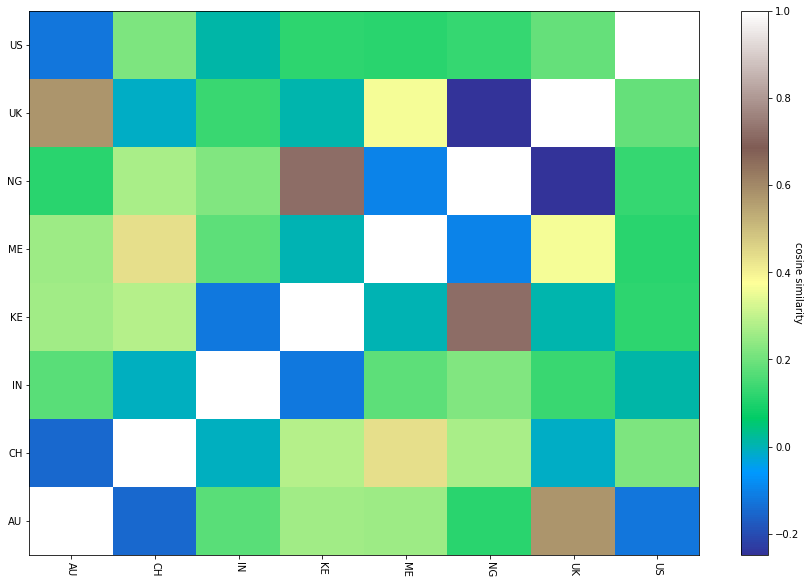

In [10]:
import seaborn, matplotlib, sklearn, sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
heatmapMatrix = []
countries = news_df.country.unique()
for tagOuter in countries:
    column = []
    tagVec = d2v_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in countries:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, d2v_model.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)
fig, ax = plt.subplots(figsize=(15,10))
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(countries, minor=False, rotation=270)
a = ax.set_yticklabels(countries, minor=False)


In [12]:
def get_vecs_for_country(country_tag):
    holder = []
    for ix, row in news_df[news_df['country']==country_tag].iterrows():
        holder.append(d2v_model.docvecs[row['filename']])
    return np.array(holder)

In [13]:
#sklearn.metrics.pairwise.cosine_similarity(get_vecs_for_country('NG'), get_vecs_for_country('KE')).var()
means = np.zeros((8,8))
for ix, country in enumerate(news_df.country.unique()):
    for jx, country2 in enumerate(news_df.country.unique()):
        means[ix,jx] = sklearn.metrics.pairwise.cosine_similarity(get_vecs_for_country(country), 
                                                                  get_vecs_for_country(country2)).mean()


In [22]:
variances = np.zeros((1,8))
for ix, country in enumerate(news_df.country.unique()):
    variances[0,ix] = sklearn.metrics.pairwise.cosine_similarity(get_vecs_for_country(country), 
                                                                  get_vecs_for_country(country)).var()
#    for jx, country2 in enumerate(news_df.country.unique()):
#        variances[ix,jx] = sklearn.metrics.pairwise.cosine_similarity(get_vecs_for_country(country), 
#                                                                  get_vecs_for_country(country2)).var()


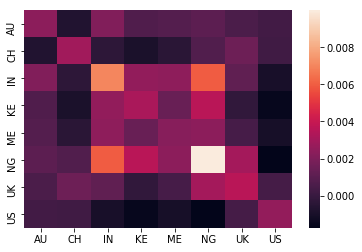

In [17]:
import seaborn as sns
ax = sns.heatmap(means,xticklabels=countries, yticklabels=countries)

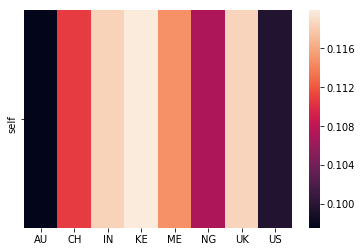

In [26]:
import seaborn as sns
ax = sns.heatmap(variances, xticklabels=countries, yticklabels=['self'])

array(['AU', 'CH', 'IN', 'KE', 'ME', 'NG', 'UK', 'US'], dtype=object)

In [10]:
#d2v_model.docvecs[news_df.iloc[3].filename]


array([[0.04415941]], dtype=float32)

array([[ 1.0000001 , -0.15952455],
       [-0.15952455,  0.99999976]], dtype=float32)